In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
uac5 = pd.read_csv("Unemployment and Crime.csv")

In [3]:
uac6 = uac[['Burglary', 'Unemploy_Georgia']]

In [4]:
uac6.head()

,Burglary,Unemploy_Georgia
0,7269,0.091
1,5345,0.086
2,5630,0.082
3,6248,0.079
4,7103,0.082


## Test Assumptions

In [6]:
uac6.dropna(inplace = True)

<ipython-input-6-6719468c7f4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac6.dropna(inplace = True)


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Burglary', ylabel='Density'>

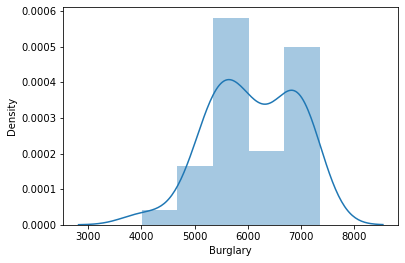

In [8]:
sns.distplot(uac6['Burglary'])

In [9]:
uac6['BurglarySQRT'] = np.sqrt(uac6['Burglary'])

<ipython-input-9-0e7b13fb2555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac6['BurglarySQRT'] = np.sqrt(uac6['Burglary'])


In [10]:
uac6.head()

,Burglary,Unemploy_Georgia,BurglarySQRT
0,7269,0.091,85.258431
1,5345,0.086,73.109507
2,5630,0.082,75.033326
3,6248,0.079,79.044291
4,7103,0.082,84.279298


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BurglarySQRT', ylabel='Density'>

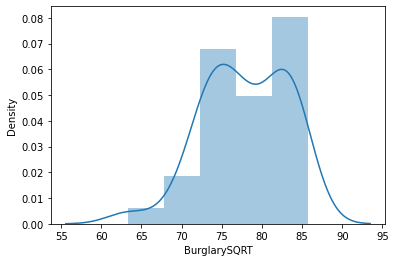

In [12]:
sns.distplot(uac6['BurglarySQRT'])

In [13]:
scipy.stats.bartlett(uac6['BurglarySQRT'], uac6['Unemploy_Georgia'])

BartlettResult(statistic=381.3271476596841, pvalue=6.39766733633381e-85)

In [14]:
scipy.stats.fligner(uac6['BurglarySQRT'], uac6['Unemploy_Georgia'])

FlignerResult(statistic=45.51382094232035, pvalue=1.5156555687264974e-11)

## Sample Size

In [15]:
uac6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Burglary          36 non-null     int64  
 1   Unemploy_Georgia  36 non-null     float64
 2   BurglarySQRT      36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


## Indpendence

In [16]:
uac6.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [17]:
postHoc = MultiComparison(uac6['BurglarySQRT'], uac6['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 0.054  0.057  -1.6863    0.9 -17.6442 14.2717  False
 0.054   0.06  -3.4846    0.9 -20.9657 13.9964  False
 0.054  0.061   3.1125    0.9 -18.2973 24.5224  False
 0.054  0.062  -0.8024    0.9 -22.2122 20.6075  False
 0.054  0.063  -5.0745    0.9 -22.5556 12.4065  False
 0.054  0.064  -1.2573    0.9 -18.7383 16.2238  False
 0.054  0.066   2.2917    0.9 -15.1893 19.7728  False
 0.054  0.067   2.3144    0.9 -19.0955 23.7242  False
 0.054  0.069   8.1801    0.9 -13.2297 29.5899  False
 0.054  0.072   5.9615    0.9 -15.4483 27.3714  False
 0.054  0.073   4.7506    0.9 -11.2074 20.7085  False
 0.054  0.074   8.8509    0.9 -12.5589 30.2607  False
 0.054  0.075  -3.0269    0.9 -24.4367 18.3829  False
 0.054  0.076    6.121    0.9 -11.3601  23.602  False
 0.054  0.079   6.0638    0.9 -11.4172 23.5449  False
 0.054   0.08   9.2748 0.722

In [18]:
uac6.groupby('Unemploy_Georgia').mean()

,Burglary,BurglarySQRT
Unemploy_Georgia,,
0.054,5625.500000,74.964353
0.057,5372.666667,73.278062
0.060,5115.500000,71.479724
0.061,6096.000000,78.076885
0.062,5500.000000,74.161985
0.063,4928.000000,69.889812
0.064,5433.000000,73.707084
0.066,5968.500000,77.256056
0.067,5972.000000,77.278716
